<a href="https://colab.research.google.com/github/Septree/Septree.github.io/blob/main/ResNet50_CatnDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading data

In [32]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

import os
import zipfile
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


from sklearn.model_selection import train_test_split

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

--2024-12-23 08:58:41--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.111.207, 142.251.163.207, 142.251.167.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.111.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   249MB/s    in 0.3s    

2024-12-23 08:58:42 (249 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



## Reading the Data into arrays

In [33]:
from PIL import Image
import numpy as np

x_data, y_data = [], []

cats_dir = os.path.join(train_dir, "cats")
dogs_dir = os.path.join(train_dir, "dogs")

i = 0
# (nevermind, not needed) NUMBER_OF_EXAMPLES = len(os.listdir(cats_dir))  #this will count the ottal number of cat images, probably wonyt use it though

for cat_img in os.listdir(cats_dir):
    img_path = os.path.join(cats_dir, cat_img)
    im = Image.open(img_path).convert("RGB").resize((150, 150))
    x_data.append(np.array(im))
    y_data.append(1)  # 1 stands for cats

for dog_img in os.listdir(dogs_dir):
    img_path = os.path.join(dogs_dir, dog_img)
    im = Image.open(img_path).convert("RGB").resize((150, 150))
    x_data.append(np.array(im))
    y_data.append(0)  # 0 for dogs

x_data = np.array(x_data) /255.0 #so that its from 0 to 1
y_data = np.array(y_data)


Train data: (1600, 150, 150, 3), (1600,)
Validation data: (400, 150, 150, 3), (400,)


Random Check -> Label: Dog


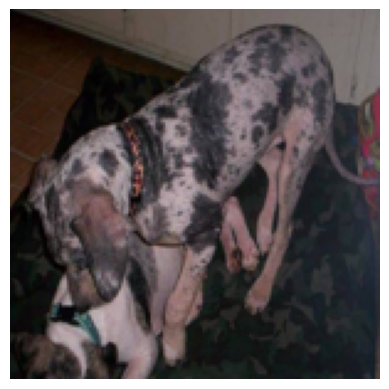

In [34]:
import random

# randomly pick and check labels
random_index = random.randint(0, len(x_train) - 1)
plt.imshow(x_train[random_index])
plt.axis('off')
label = 'Cat' if y_train[random_index] == 1 else 'Dog'
print(f"Random Check -> Label: {label}")
plt.show()


## Beginning to define the model (this is where you come in, I loaded the pretrained model for you)

In [35]:


# now we load in resnet
base_model = ResNet50(
    include_top=False, #note: from step 3 of "how to get started", reasoning : so add our own model to train
    input_shape=(150, 150, 3),
    pooling='avg',
    weights='imagenet'
)

# stop it from being able to being trained, this way we can keep the pretrained featutres
base_model.trainable = False

# build the full model
model = Sequential([
    base_model,
    Dense(1, activation='sigmoid')  # custom output layer for binary classification
])
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

training the model

In [37]:
# train the model on training data
h = model.fit(
    x_train, y_train,
    epochs=5,  # you can adjust the number of epochs
    batch_size=32,
    validation_split=0.2  # 20% of the data will be used for validation
)


Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 165s 4s/step - accuracy: 0.4958 - loss: 0.7298 - val_accuracy: 0.4563 - val_loss: 0.7119
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 198s 4s/step - accuracy: 0.4896 - loss: 0.7008 - val_accuracy: 0.4688 - val_loss: 0.6951
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 199s 4s/step - accuracy: 0.5016 - loss: 0.6924 - val_accuracy: 0.4812 - val_loss: 0.6931
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 188s 3s/step - accuracy: 0.5229 - loss: 0.6909 - val_accuracy: 0.5125 - val_loss: 0.6914
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 153s 4s/step - accuracy: 0.5434 - loss: 0.6886 - val_accuracy: 0.5594 - val_loss: 0.6894


now we unfreeze the base model, then we continue training

In [38]:
base_model.trainable = True


for layer in base_model.layers[:-10]:
    layer.trainable = False

In [39]:
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # even smaller Learning Rate for fine-tuning
    loss='binary_crossentropy',
    metrics=['accuracy']
)

now retrain

In [40]:
fine_tune_h= model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=5,         # some more epochs
    batch_size=32
)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 217s 4s/step - accuracy: 0.5715 - loss: 0.6711 - val_accuracy: 0.5425 - val_loss: 0.6834
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 258s 4s/step - accuracy: 0.6411 - loss: 0.6373 - val_accuracy: 0.5050 - val_loss: 0.6871
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 263s 4s/step - accuracy: 0.6716 - loss: 0.6139 - val_accuracy: 0.5300 - val_loss: 0.6800
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 254s 4s/step - accuracy: 0.6764 - loss: 0.5942 - val_accuracy: 0.5900 - val_loss: 0.6643
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 208s 4s/step - accuracy: 0.7018 - loss: 0.5767 - val_accuracy: 0.5825 - val_loss: 0.6743


i want it to see random images, so i will do this to see realtime how my model is working, was a fun project overall

In [5]:
import random
import matplotlib.pyplot as plt
import numpy as np
#used some online sources to learn hwo to do this
def test_random_image(num_samples=5):
    for _ in range(num_samples):
        idx = random.randint(0, len(x_data) - 1)
        img = x_data[idx]
        true_label = y_data[idx]

        # predict
        prediction = model.predict(img[np.newaxis, ...])[0][0]
        predicted_label = 'Cat' if prediction > 0.5 else 'Dog'
        true_label_str = 'Cat' if true_label == 1 else 'Dog'

        plt.imshow(img)
        plt.axis('off')
        plt.title(f"True: {true_label_str}, Pred: {predicted_label} ({prediction:.2f})")
        plt.show()


finally, evaluate the total accurary now

note: i could increase epochs by 5 but not too much to avoid overfitting to improve accurary, however it already took very long to do this at 5 epochs, so im happy with the current results.

In [42]:
# evaluate total accurary
loss, accuracy = model.evaluate(x_data, y_data, verbose=0)
print(f"Accuracy on entire dataset: {accuracy:.4f}")
train_loss, train_acc = model.evaluate(x_train, y_train)
val_loss, val_acc = model.evaluate(x_val, y_val)

num_train = len(x_train)
num_val = len(x_val)
total_acc = (train_acc * num_train + val_acc * num_val) / (num_train + num_val)
print(f"Total Accuracy: {total_acc:.4f}")


Accuracy on entire dataset: 0.6045
50/50 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.6264 - loss: 0.6491
13/13 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.6103 - loss: 0.6608
Total Accuracy: 0.6045


I ACCIDENTLY CLEARED THE MEMORY AFTER SO MUCH TIME OF TRAINING IT ;-; I AM GOING TO SAVE IT SO THAT THIS DOESNT HAPPEN AGAIN

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive
